<a href="https://colab.research.google.com/github/roheth286/CSI_ForkThis25_Final_Clustering/blob/master/CSI_Forkthis_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering of Sensorless Drive Diagnosis**

---

This dataset contains features extracted from motor current signals. The motor operates under 11 distinct conditions, reflecting combinations of intact and defective components, measured across 12 different operating setups, including variations in speed, load moments, and load forces. The current signals were recorded using a probe and oscilloscope on two phases. However, the dataset does not explicitly indicate which conditions are defective or intact. To explore the inherent structure and groupings within the data, we apply clustering algorithms. By leveraging unsupervised techniques, we aim to identify natural clusters corresponding to different motor conditions, potentially separating defective from intact components, and gain insights into how the various operating conditions influence the observed signal features.

The Dataset contains of 58509 examples each having 48 features (the last column is the labels columns which tell's which class the specific example will fall into)

#**1. Loading the Dataset and Preprocessing**

---

**1.1 Loading the dataset**

*  Here we are importing a .txt file from our local system and converting it to a numpy ndarray.

In [3]:
import numpy as np
import io
from google.colab import files


##### Upload the .txt file ################


uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = np.loadtxt(io.BytesIO(uploaded[filename]))
file_object=io.BytesIO(uploaded[filename])
data=np.loadtxt(file_object)
print("Dataset Loaded Successfully\n")
print(data)
print(data.shape)

Saving Sensorless_drive_diagnosis.txt to Sensorless_drive_diagnosis.txt
Dataset Loaded Successfully

[[-3.0146e-07  8.2603e-06 -1.1517e-05 ... -1.4996e+00 -1.4996e+00
   1.0000e+00]
 [ 2.9132e-06 -5.2477e-06  3.3421e-06 ... -1.5005e+00 -1.5005e+00
   1.0000e+00]
 [-2.9517e-06 -3.1840e-06 -1.5920e-05 ... -1.4985e+00 -1.4985e+00
   1.0000e+00]
 ...
 [-5.8577e-06  1.8594e-05 -1.0171e-04 ... -1.4912e+00 -1.4910e+00
   1.1000e+01]
 [-4.4411e-06  3.3969e-05 -4.4166e-04 ... -1.4932e+00 -1.4931e+00
   1.1000e+01]
 [-8.8533e-06  5.2259e-05  7.2466e-05 ... -1.4946e+00 -1.4943e+00
   1.1000e+01]]
(58509, 49)


**1.2 Seperating the Labels form the Dataset and Normalizing**

*  Converting our Numpy array into a Pandas Dataframe
*  Removing the labels column
*  Normalizaing our data before clustering

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


##### Converting NumpyArray to Pandas Dataframe ##############
print("Number of rows and coulmns in the Dataset")
print("Columns:",data.shape[1])
print("Rows:",data.shape[0],"\n")
df=pd.DataFrame(data)

###### Seperating Labels Columns ########

labels=df.iloc[:,-1]
print(df.shape,labels.shape)


########## Number of Unique Values #########
number_of_unique_labels=labels.nunique()
print("\nNumber of Unique Labels:",number_of_unique_labels)
unique_lables=labels.unique()
print("Unique Labels:",unique_lables)
labels_count=labels.value_counts()
print("Labels Count:\n",labels_count)

###### Z-Score Normailzation ############

scaler=StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

Number of rows and coulmns in the Dataset
Columns: 49
Rows: 58509 

(58509, 49) (58509,)

Number of Unique Labels: 11
Unique Labels: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
Labels Count:
 48
1.0     5319
2.0     5319
3.0     5319
4.0     5319
5.0     5319
6.0     5319
7.0     5319
8.0     5319
9.0     5319
10.0    5319
11.0    5319
Name: count, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.042273,0.122776,-0.054947,-0.015927,-0.049283,-0.092664,0.817264,0.817132,0.817376,-0.316864,...,-0.009406,-0.347679,-0.023450,1.308985,1.311947,1.295447,-0.578124,-0.571083,-0.602998,1.0
1,0.087101,-0.120376,0.008203,-0.075777,0.025220,-0.015416,0.792201,0.792451,0.792286,-0.325242,...,-0.007810,0.026616,-0.320561,1.144930,1.148347,1.130230,-0.862670,-0.855606,-0.886485,1.0
2,0.005315,-0.083228,-0.073660,0.001668,-0.051697,0.078074,0.849046,0.849217,0.849594,-0.269799,...,-0.009384,-0.362632,-0.452653,0.707449,0.712081,0.717189,-0.230345,-0.223334,-0.256514,1.0
3,0.028033,0.132852,-0.073485,-0.055887,-0.036735,0.019494,0.753975,0.753811,0.754200,-0.274642,...,-0.008999,-0.059460,-0.306610,1.254300,1.257414,1.240375,0.085818,0.092802,0.026973,1.0
4,0.045523,-0.015715,-0.116099,-0.082711,-0.037897,0.060818,0.773417,0.773501,0.774161,-0.293249,...,-0.009287,-0.223125,0.190275,1.391013,1.393747,1.378055,0.591678,0.598620,0.562448,1.0


#**2. Clustering Techniques**

**2.1 WCCS VS. K-Values**

The WCSS (Within-Cluster Sum of Squares) vs. K-values graph helps determine the optimal number of clusters for KMeans. WCSS measures the total variance within each cluster, so lower values indicate tighter clusters. By plotting WCSS for different numbers of clusters (K), we look for an “elbow” point where adding more clusters yields diminishing returns in reducing variance. This point suggests a suitable number of clusters that balances compactness and simplicity, guiding our choice of K before performing the final clustering.

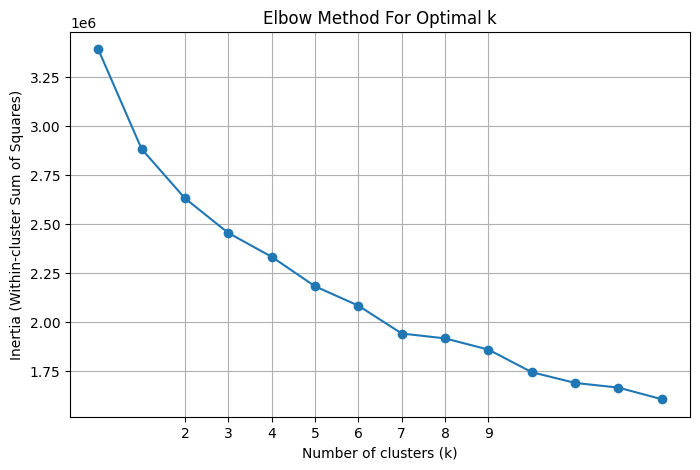

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

############ Finding Loss for different number of clusters ####################
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

############### Plot the elbow curve #################################
plt.figure(figsize=(8, 5))
plt.plot(inertia, marker='o')
plt.xticks(range(2, 10))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


**2.2 Silhouette Score vs Number of Clusters**

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters. It combines cohesion (how close points are within the same cluster) and separation (how far they are from points in other clusters). Scores range from -1 to 1, with higher values indicating better-defined, more distinct clusters. By calculating the silhouette score for various numbers of clusters, we can assess which K produces the most coherent clustering. The resulting Silhouette Score vs. Number of Clusters graph visualizes this relationship, helping identify the number of clusters that maximizes cluster quality and separation.

k:  -1  Silhouette Score:  0.20131292859336938
k:  0  Silhouette Score:  0.20131292859336938
k:  2  Silhouette Score:  0.20131292859336938
k:  3  Silhouette Score:  0.20131292859336938
k:  5  Silhouette Score:  0.20131292859336938
k:  8  Silhouette Score:  0.20131292859336938
k:  10  Silhouette Score:  0.20131292859336938
k:  25  Silhouette Score:  0.20131292859336938
k:  100  Silhouette Score:  0.20131292859336938
k:  1000  Silhouette Score:  0.20131292859336938


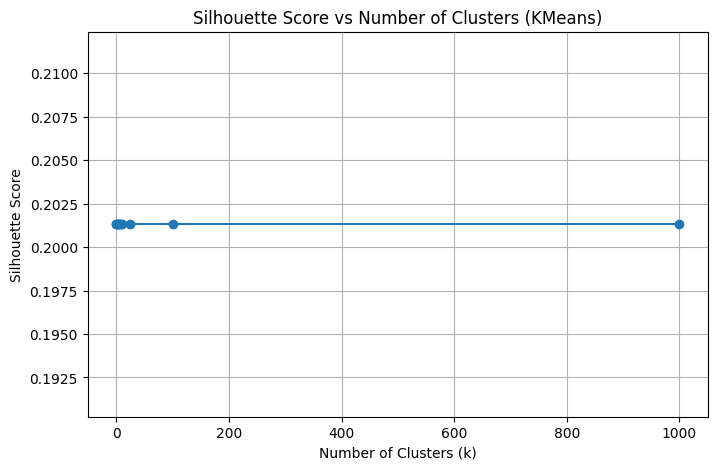

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_numbers = [-1,0,2,3,5,8,10,25,100,1000]
sil_scores = []

for k in cluster_numbers:
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df)
    score = silhouette_score(df, cluster_labels)
    sil_scores.append(score)
    print("k: ", k," Silhouette Score: ",score)

plt.figure(figsize=(8,5))
plt.plot(cluster_numbers, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters (KMeans)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


**2.3 Chossing the correct number of clusters**

The Within-Cluster Sum of Squares (WCSS) measures the total variance within each cluster, essentially quantifying how tightly the data points are grouped. Lower WCSS values indicate more compact clusters. By plotting WCSS against different numbers of clusters, we look for the “elbow point”—the K value after which adding more clusters does not significantly reduce WCSS. This point suggests a balance between minimizing intra-cluster variance and avoiding an excessive number of clusters. The WCSS vs. Number of Clusters graph thus provides a visual way to estimate the optimal cluster count, complementing the silhouette analysis, and helps in making a data-driven decision on the appropriate number of clusters for meaningful separation.

The Silhouette Score measures how well each data point fits within its assigned cluster compared to other clusters. It combines cohesion (how close points are within the same cluster) and separation (how far they are from points in other clusters). Scores range from -1 to 1, with higher values indicating better-defined, more distinct clusters. By calculating the silhouette score for various numbers of clusters, we can assess which K produces the most coherent clustering. The resulting Silhouette Score vs. Number of Clusters graph visualizes this relationship, helping identify the number of clusters that maximizes cluster quality and separation.



In [10]:
best_k=3

**2.4 Principal Component Anaylsis**

Clustering directly on the raw dataset with all its features tends to produce poor silhouette scores because the high-dimensional space dilutes the natural groupings, making it difficult for clustering algorithms to distinguish distinct clusters. To address this, we apply Principal Component Analysis (PCA), a dimensionality reduction technique that transforms the original features into a smaller set of uncorrelated components while retaining the maximum variance. By projecting the data onto the first few principal components, we reduce noise and redundancy, allowing clusters to become more separable. Although the silhouette scores improve with PCA, they still highlight the inherent challenge of separating classes purely based on the extracted features, emphasizing the need for careful selection of components and cluster counts to uncover meaningful structures.

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result_2 = pca.fit_transform(df)
df_pca_2 = pd.DataFrame(pca_result_2, columns=['PC1', 'PC2'])

pca = PCA(n_components=3)
pca_result_3 = pca.fit_transform(df)
df_pca_3 = pd.DataFrame(pca_result_3, columns=['PC1', 'PC2', 'PC3'])

pca = PCA(n_components=5)
pca_result_5 = pca.fit_transform(df)
df_pca_5 = pd.DataFrame(pca_result_5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

pca = PCA(n_components=8)
pca_result_8 = pca.fit_transform(df)
df_pca_8 = pd.DataFrame(pca_result_8, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'])

pca = PCA(n_components=10)
pca_result_10 = pca.fit_transform(df)
df_pca_10 = pd.DataFrame(pca_result_10, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8','PC9','PC10'])

pca_dict = {
    2: df_pca_2,
    3: df_pca_3,
    5: df_pca_5,
    8: df_pca_8,
    10: df_pca_10
}

**2.5 Choosing the Correct Combination of reduced dimensions and number of clusters**

In this step, we aim to identify the optimal number of dimensions that allow clear and well-separated clusters. We achieve this by applying PCA with different numbers of components (2, 3, 5, 8, and 10) to reduce the dataset’s dimensionality. For each reduced dataset, we perform KMeans clustering with a fixed number of clusters and calculate the silhouette score, which measures how well-separated the clusters are. By comparing silhouette scores across different PCA dimensions, we can determine which number of components best captures the underlying structure of the data, helping us choose a dimensionality that produces the most coherent clustering.

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_sil = -1
best_pca = 2

for n_components, X_pca_df in pca_dict.items():
    X_pca = X_pca_df.values
    kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    sil_score = silhouette_score(X_pca, labels)

    print("PCA components:", n_components, "silhouette:", sil_score)

    if sil_score > best_sil:
        best_sil = sil_score
        best_pca = n_components

print("done")
# PCA components: 2 silhouette: 0.3899965103019307
# PCA components: 3 silhouette: 0.3059390397517326
# PCA components: 5 silhouette: 0.23618876089401958
# PCA components: 8 silhouette: 0.20848130339127696
# PCA components: 10 silhouette: 0.19512799696657976


PCA components: 2 silhouette: 0.3899965103019307
PCA components: 3 silhouette: 0.3059390397517326
PCA components: 5 silhouette: 0.23618876089401958
PCA components: 8 silhouette: 0.20848130339127696
PCA components: 10 silhouette: 0.19512799696657976
done


In [18]:
print(best_pca)
print(best_sil)

2
0.3899965103019307


**2.6 K-means Clustering with optimized combination**

K-means clustering is a straightforward and widely used technique to group data points into distinct clusters based on their similarity. It works by first choosing a set number of clusters, then assigning each data point to the nearest cluster center (centroid). After all points are assigned, the centroids are recalculated as the average of points in that cluster, and this process repeats iteratively until the assignments stabilize. The goal is to minimize the variance within each cluster, so points within a cluster are as similar as possible while being distinct from points in other clusters. It’s simple, fast, and effective for finding patterns in datasets where the number of clusters is roughly known in advance.

In [22]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)
print("KMeans clustering done.")

KMeans clustering done.


**2.7 Gaussian Mixture Modelling with optimized combination**

Gaussian Mixture Model (GMM) clustering is a probabilistic approach to grouping data points. Unlike K-means, which assigns each point strictly to one cluster, GMM assumes that data is generated from a mixture of several Gaussian distributions and assigns each point a probability of belonging to each cluster. The model iteratively estimates the parameters (mean, variance, and weight) of these Gaussians to maximize the likelihood of the observed data. This allows GMM to capture clusters that are not strictly spherical or equally sized, making it more flexible for datasets with overlapping or elliptical clusters. In simple terms, GMM tries to “fit” multiple bell-shaped distributions to the data, letting us understand cluster structure in a probabilistic way.
Spectral Clustering is a graph-based clustering method that treats the data points as nodes in a graph. Instead of directly partitioning points in the original space, it constructs a similarity graph where edges represent how close or connected points are. Then it computes the eigenvectors of the graph’s Laplacian matrix and projects the data into this lower-dimensional spectral space. Finally, a standard clustering algorithm (like KMeans) is applied in this space to assign cluster labels. This method is especially powerful for detecting clusters that are non-convex or not well-separated in the original feature space.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

gmm_labels = ## cluster labels for gmm
spectral_labels = ## cluster labels for spectral


#**3. Visuialization**

**3.1 PCA scatter**

These two PCA scatter plots let us visually compare the clustering results with the actual labels. The first plot shows the data points colored according to the KMeans cluster assignments, so we can see how the algorithm has grouped the points in the reduced PCA space. The second plot shows the true labels for each point, allowing us to visually assess how well the clusters align with the actual classes. By comparing the two, we can quickly spot which clusters correspond to which labels, see overlaps, and get a sense of how separable the classes are in the PCA-reduced feature space.

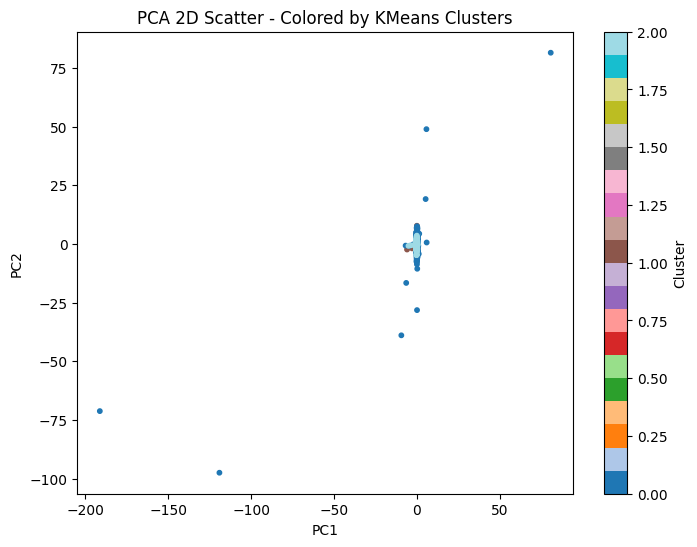

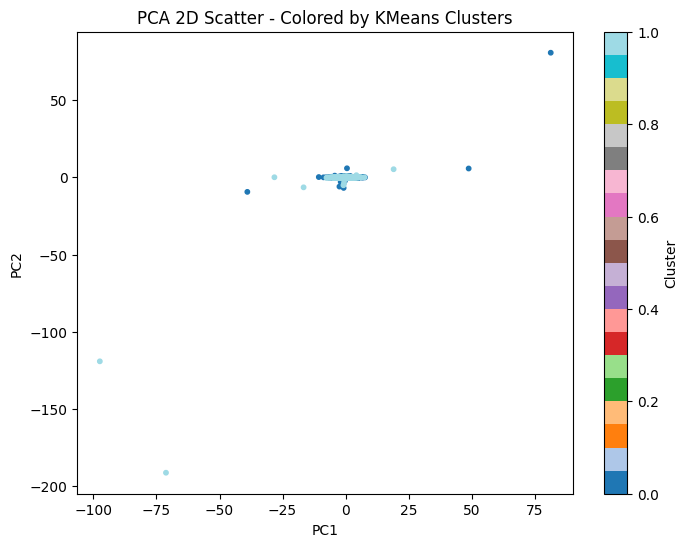

In [24]:
import matplotlib.pyplot as plt
import numpy as np

df_plot=df
labels_int = labels.astype(int)
############################# Plot coloured by Clusters ###################################################
plt.figure(figsize=(8,6))
plt.scatter(df_plot.iloc[:,0], df_plot.loc[:,1], c=labels, cmap='tab20', s=10)
plt.title("PCA 2D Scatter - Colored by KMeans Clusters")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()



labels_int = labels.astype(int)
############################# Plot coloured by Clusters ###################################################
plt.figure(figsize=(8,6))
plt.scatter(df_plot.iloc[:,1], df_plot.iloc[:,0], c=kmeans_labels, cmap='tab20', s=10)
plt.title("PCA 2D Scatter - Colored by KMeans Clusters")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

**3.2 UMAP 2D scatter:**


UMAP (Uniform Manifold Approximation and Projection) is a nonlinear dimensionality reduction technique that preserves both local and global structure of the data, often producing more meaningful clusters in lower dimensions compared to PCA. In these two scatter plots, we use UMAP to reduce the dataset to two dimensions. The first plot colors the points according to KMeans cluster assignments, showing how the algorithm has grouped the data in the UMAP-reduced space. The second plot colors the same points based on their true labels, letting us visually assess how well the clusters align with the actual classes. Comparing these plots helps us see if the clustering algorithm is capturing the underlying class structure effectively and where there might be overlaps or misclassifications.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


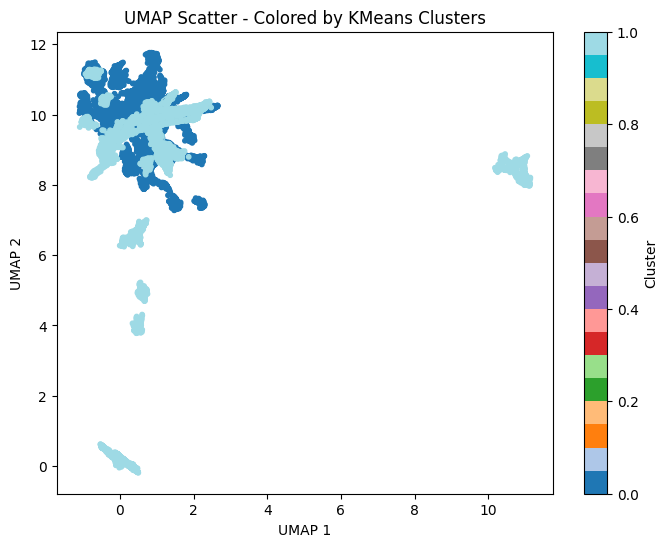

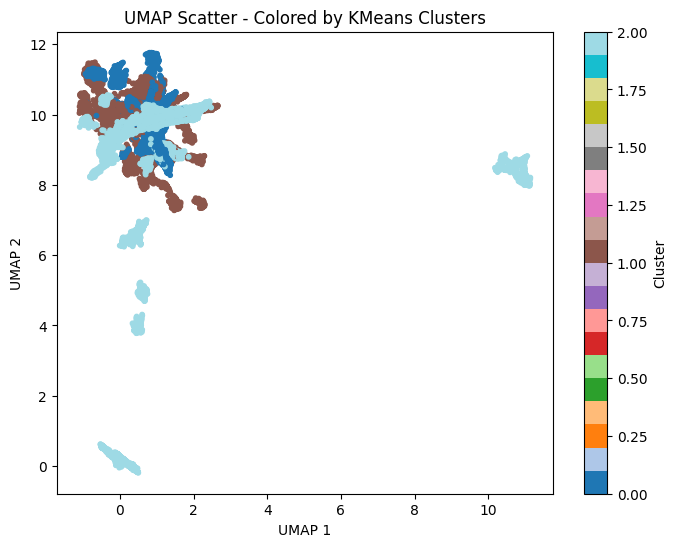

In [25]:
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(df_plot)

################################ UMAP colored by KMeans clusters #############################################33
plt.figure(figsize=(8,6))
plt.scatter(umap_result[:,0], umap_result[:,1], c=kmeans_labels, cmap='tab20', s=10)
plt.title("UMAP Scatter - Colored by KMeans Clusters")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Cluster')
plt.show()

##################################### UMAP coloured by Labels #######################################
plt.figure(figsize=(8,6))
plt.scatter(umap_result[:,0], umap_result[:,1], c=labels, cmap='tab20', s=10)
plt.title("UMAP Scatter - Colored by Labels")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Label')
plt.show()

**3.3 t-SNE Plot**

t-SNE (t-distributed Stochastic Neighbor Embedding) is another nonlinear dimensionality reduction technique that is particularly good at preserving local neighborhood structure, meaning points that are close in the original high-dimensional space tend to stay close in the 2D embedding. In these two scatter plots, t-SNE reduces the data to two dimensions. The first plot colors points according to KMeans cluster assignments, showing how the algorithm has grouped the data in the t-SNE space. The second plot colors the points by true labels, letting us visually check how well the clusters align with the actual classes. By comparing the two plots, we can see whether the clusters produced by KMeans match the inherent structure of the data and identify any overlaps, separations, or misclassifications.

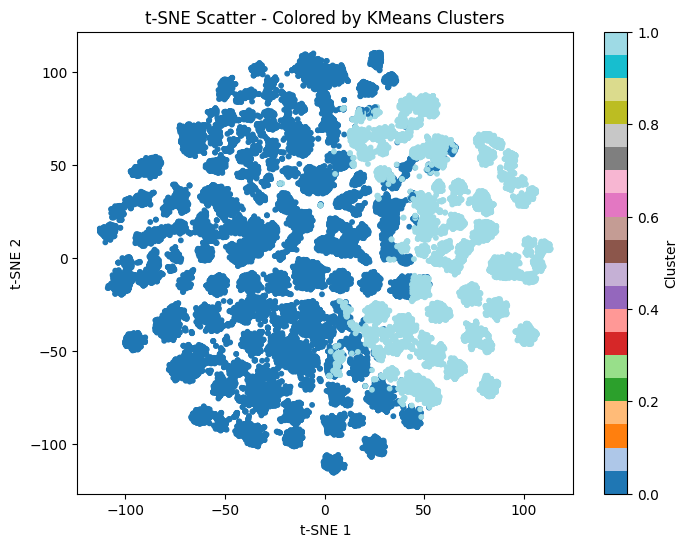

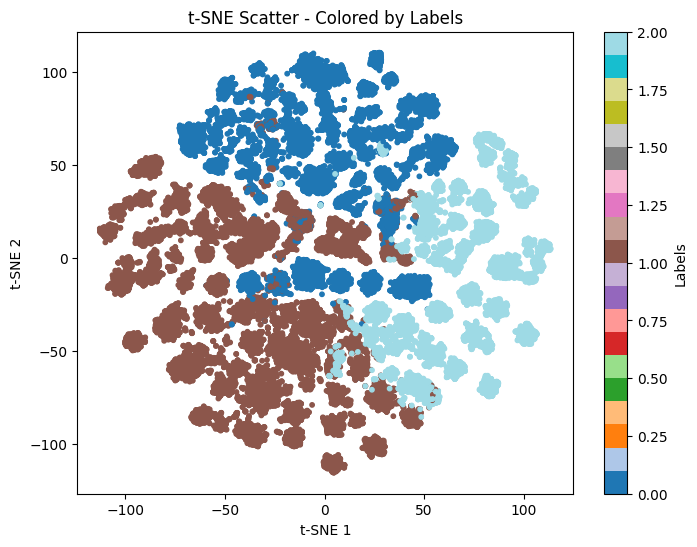

In [26]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df)

######################################## t-SNE colored by KMeans clusters ##########################################
plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=kmeans_labels, cmap='tab20', s=10)
plt.title("t-SNE Scatter - Colored by KMeans Clusters")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster')
plt.show()

######################################## t-SNE colored by Labels ##########################################
plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=labels, cmap='tab20', s=10)
plt.title("t-SNE Scatter - Colored by Labels")
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Labels')
plt.show()

#**4. Evaluation**

**4.1 Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index**

1.Silhouette Score:

* A metric that measures how well-separated and cohesive clusters are.

* Value range: –1 to 1 (higher is better).

* Meaning: A high score means points are well matched to their own cluster and far from other clusters. A negative score suggests points may be in the wrong cluster.

2.Calinski-Harabasz Index (Variance Ratio Criterion)

* A ratio of the between-cluster dispersion to within-cluster dispersion.

* Value range: Positive real numbers (higher is better).

* Meaning: A higher index indicates that clusters are dense, distinct, and well-separated relative to their internal variance.

3.Davies-Bouldin Index

* An average similarity measure of each cluster with its most similar cluster.

* Value range: ≥ 0 (lower is better).

* Meaning: A low index indicates clusters are compact and far apart, while a high index suggests overlapping or poorly separated clusters.

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

######################## Kmeans ###############################################
sil_score = silhouette_score(df, labels)
ch_score = calinski_harabasz_score(df,labels)
db_score = davies_bouldin_score(df, labels)

print("Kmeans")
print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)
print("\n")


################################# GMM #####################################
sil_score =
ch_score =
db_score =

print("GMM")
print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)
print("\n")

###################################### Spectral ########################################
sil_score =
ch_score =
db_score =

print("Spectral")
print("Silhouette Score:", sil_score)
print("Calinski-Harabasz Index:", ch_score)
print("Davies-Bouldin Index:", db_score)
print("\n")

**4.2 Hungarian Matching Accuracy**

Hungarian matching accuracy is a way to evaluate clustering results when the cluster labels are arbitrary. Since clustering algorithms don’t know the true class labels, the numeric cluster IDs may not match the actual class numbers. The Hungarian algorithm finds the best one-to-one mapping between predicted clusters and true labels to maximize the number of correctly matched points. This gives a meaningful measure of clustering accuracy.

Steps to implement Hungarian matching accuracy:

* Build a confusion matrix – Count how many samples from each predicted cluster fall into each true class.

* Apply Hungarian algorithm – Use it on the confusion matrix to find the optimal label mapping that maximizes matches.

* Calculate accuracy – Sum the matched counts and divide by the total number of samples.

In [ ]:
import numpy as np
from scipy.optimize import linear_sum_assignment

##################################3 Hungarian matching accuracy ####################################################3
def hungarian_accuracy(y_true, y_pred):
  ## Write the function logic here
   return accuracy


###################################### KMeans ################################
acc = hungarian_accuracy(labels, kmeans_labels)
print("Accuracy (Hungarian):", acc)


############################## GMM ################################
acc = hungarian_accuracy(labels,)
print("Accuracy (Hungarian):", acc)

############################## Spectral ###########################
acc = hungarian_accuracy(labels,)
print("Accuracy (Hungarian):", acc)


**4.3 Feature importance via PCA loadings**

When you perform PCA (Principal Component Analysis), the new axes (principal components) are combinations of the original features. Each principal component captures a certain amount of variance in the dataset, but by itself it doesn’t directly tell you which features are most important.
By examining loadings — the weights of original features in each principal component — you can figure out which features drive the biggest patterns in your data. This is critical for interpretability: it connects the reduced dimensions back to real-world meaning.

Steps:

* Perform PCA on the dataset to reduce dimensionality.

* Extract the loadings (weights) of each feature for each principal component.

* Rank the absolute loadings and select the top features for each component.

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA